CSE-221710302039-M.Abhishek Naidu

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [4]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [5]:

import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [6]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

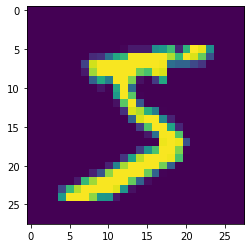

In [7]:
plt.imshow(train_digits[0])

In [8]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([38942, 53481, 14444, 16887, 35759, 37983, 45011, 57121, 15928,
       56717, 46831, 32444, 24148, 51231, 39355,  1773])

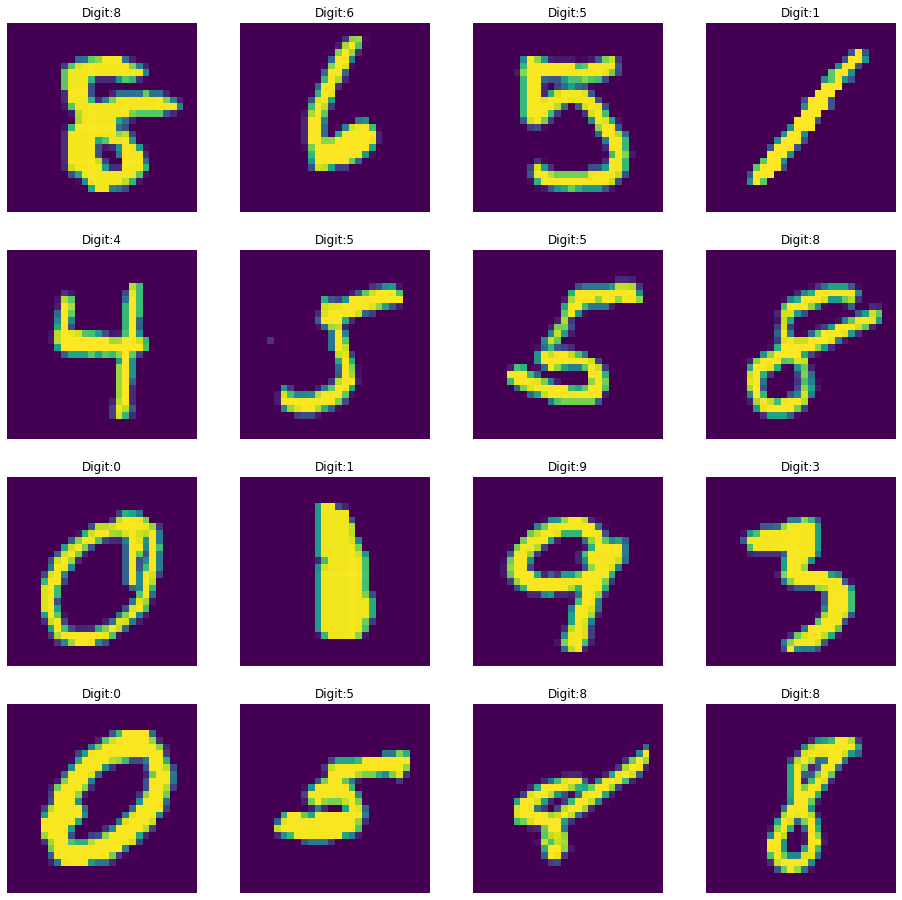

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1


In [10]:
train_digits[0][5:10,22:25]


array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat = to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [18]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [19]:

from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [21]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 128us/step - loss: 0.2503 - accuracy: 0.9236 - val_loss: 0.1440 - val_accuracy: 0.9568
Epoch 2/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.1133 - accuracy: 0.9646 - val_loss: 0.1131 - val_accuracy: 0.9678
Epoch 3/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.1186 - val_accuracy: 0.9697
Epoch 4/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.0672 - accuracy: 0.9795 - val_loss: 0.1074 - val_accuracy: 0.9735
Epoch 5/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.1020 - val_accuracy: 0.9745


In [22]:

model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 31us/step


[0.1021033645236399, 0.9739999771118164]

In [23]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [24]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.26342633e-11, 1.09105727e-07, 7.87227208e-08, 1.46817740e-06,
        8.08009770e-10, 3.71188184e-11, 2.14185376e-14, 9.99998212e-01,
        2.51590726e-09, 1.15530874e-07]], dtype=float32)

In [25]:
model.predict(test_digits_sc[:10])

array([[3.26342633e-11, 1.09105727e-07, 7.87227208e-08, 1.46817740e-06,
        8.08008216e-10, 3.71189607e-11, 2.14186206e-14, 9.99998212e-01,
        2.51590260e-09, 1.15530767e-07],
       [1.73109527e-07, 2.61726950e-06, 9.98339415e-01, 1.64697960e-03,
        7.32946059e-09, 5.93409868e-06, 6.22098142e-08, 1.98625094e-06,
        2.69683505e-06, 6.20373475e-10],
       [6.04555295e-09, 9.99934793e-01, 2.15024852e-06, 6.99389204e-08,
        6.56133807e-06, 3.54230650e-07, 3.39926203e-07, 5.08074882e-05,
        2.83497661e-06, 2.06048594e-06],
       [9.99976993e-01, 2.70410681e-08, 6.74180228e-07, 3.00768818e-07,
        1.00855864e-07, 9.01750718e-06, 4.32048682e-06, 4.33428539e-07,
        6.37340847e-08, 8.04000319e-06],
       [8.00094853e-08, 2.43686884e-07, 1.61074195e-06, 6.13508666e-09,
        9.99974251e-01, 1.11343496e-07, 3.43250065e-07, 9.83065434e-07,
        4.10126773e-07, 2.19713565e-05],
       [3.68030229e-09, 9.99772966e-01, 3.17585517e-07, 1.21397576e-08,
   

In [26]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])

In [27]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.26342633e-11, 1.09105727e-07, 7.87227208e-08, 1.46817740e-06,
        8.08009770e-10, 3.71188184e-11, 2.14185376e-14, 9.99998212e-01,
        2.51590726e-09, 1.15530874e-07]], dtype=float32)

In [28]:
history.history

{'accuracy': [0.9236111, 0.96462965, 0.9749445, 0.979537, 0.9832963],
 'loss': [0.25030743094202546,
  0.1133424691637909,
  0.08115952907740656,
  0.06722521009817892,
  0.053231932173508946],
 'val_accuracy': [0.9568333625793457,
  0.9678333401679993,
  0.9696666598320007,
  0.9735000133514404,
  0.9745000004768372],
 'val_loss': [0.14402719543874265,
  0.11314915368581811,
  0.11860434682294727,
  0.10742836640154323,
  0.10203848960762843]}

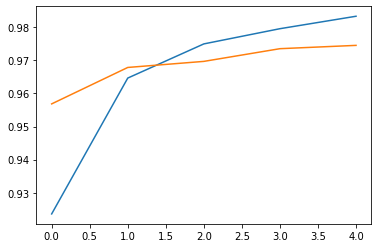

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model 2

In [30]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [31]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [32]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 36us/step


[2.3045871227264403, 0.10750000178813934]

In [33]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [34]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[0.5114619 , 0.547254  , 0.5169524 , 0.5488751 , 0.48734382,
        0.5155339 , 0.52766055, 0.48923594, 0.51295125, 0.48427182]],
      dtype=float32)

In [35]:
model1.predict(test_digits_sc[:10])

array([[0.5114619 , 0.547254  , 0.5169524 , 0.5488751 , 0.48734382,
        0.5155339 , 0.5276606 , 0.48923594, 0.51295125, 0.48427185],
       [0.52834624, 0.53172207, 0.5151057 , 0.52271825, 0.4999964 ,
        0.51053977, 0.51115537, 0.4906837 , 0.5125174 , 0.48353797],
       [0.5042482 , 0.51575875, 0.50723743, 0.5262247 , 0.50366956,
        0.50393236, 0.5080337 , 0.49777874, 0.51128125, 0.4990397 ],
       [0.5142218 , 0.5485043 , 0.50179875, 0.5535295 , 0.48269454,
        0.5074724 , 0.51228076, 0.48675036, 0.5323002 , 0.48588768],
       [0.5034453 , 0.5235077 , 0.5024435 , 0.5260955 , 0.5079365 ,
        0.5071939 , 0.49935317, 0.5117967 , 0.5151544 , 0.48644266],
       [0.5076852 , 0.50761044, 0.513569  , 0.523844  , 0.5037697 ,
        0.50479585, 0.50161344, 0.49904135, 0.50864726, 0.5084125 ],
       [0.49041054, 0.53209853, 0.5035001 , 0.52782595, 0.51689947,
        0.5114561 , 0.50164574, 0.51928055, 0.5198395 , 0.48801222],
       [0.5310284 , 0.55239415, 0.5167633

In [36]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([3])

In [37]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[0.5114619 , 0.547254  , 0.5169524 , 0.5488751 , 0.48734382,
        0.5155339 , 0.52766055, 0.48923594, 0.51295125, 0.48427182]],
      dtype=float32)

In [38]:
history.history

{'accuracy': [0.9236111, 0.96462965, 0.9749445, 0.979537, 0.9832963],
 'loss': [0.25030743094202546,
  0.1133424691637909,
  0.08115952907740656,
  0.06722521009817892,
  0.053231932173508946],
 'val_accuracy': [0.9568333625793457,
  0.9678333401679993,
  0.9696666598320007,
  0.9735000133514404,
  0.9745000004768372],
 'val_loss': [0.14402719543874265,
  0.11314915368581811,
  0.11860434682294727,
  0.10742836640154323,
  0.10203848960762843]}

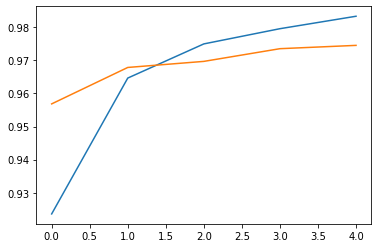

In [39]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The accuarcy and Val_Accuracy of the model 1 is :[0.08849324609435862, 0.9731000065803528]

The accuarcy andVal_Accuracy of the model 2 is :[0.08989085959342774, 0.9769999980926514]

Hence model 2 is best than model 1